# Tarea 7

1. Descargar los datos de [datos abiertos](http://www.datos.gov.co)

2. Implementar:
- Regresion Lineal
- Random Forest

## 1. Datasets analizados
- Abonados de telefonia celular: https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Telefon-a-M-vil-abonados-por-categor-a/nrst-mwx4
- accidentalidad de Armenia: https://www.datos.gov.co/Transporte/Accidentalidad-y-hechos-de-tr-nsito-de-enero-de-20/r9ab-329t
- victimas en cartagena: https://www.datos.gov.co/Inclusi-n-Social-y-Reconciliaci-n/Victimas-en-Cartagena/v287-zzav
- Familias en accion: https://www.datos.gov.co/Inclusi-n-Social-y-Reconciliaci-n/Beneficiarios-M-s-Familias-en-Acci-n/xfif-myr2
- costo de atencion hospitalaria por accidentes: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Costos-de-la-atenci-n-hospitalaria-en-Bucaramanga-/g4vd-w4ip

## 2. Implementacion

El dataset sobre el cual se implementa el codigo es sobre el de **`Familias en Accion`**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
import gc
import pickle
import numpy as np

pd.options.display.float_format = '{:,.5f}'.format

In [2]:
f = "https://www.datos.gov.co/api/views/g4vd-w4ip/rows.csv"
data = pd.read_csv(f, sep=',', dtype=str, na_values=['-','#¡NUM!','ERROR: #N/A','#N/A','#N/D','SIN INFORMACION','SN','S/N'])
data.columns = [unidecode.unidecode(c.lower().strip()).replace('  ',' ').strip().replace(' ','_') for c in data]
data = data.set_index('numero')

In [3]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 34206 entries, 1 to 34206
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   edad                                   34204 non-null  object
 1   sexo                                   34206 non-null  object
 2   tipo_de_vehiculo                       32709 non-null  object
 3   relacion_usuario/accidente             34168 non-null  object
 4   fecha_de_accidente                     34206 non-null  object
 5   fecha_de_ingreso_ips                   33394 non-null  object
 6   hora_de_accidente                      34200 non-null  object
 7   hora_de_ingreso_ips                    34106 non-null  object
 8   fecha_de_atencion_medica               25301 non-null  object
 9   hora_de_atencion_medica                32453 non-null  object
 10  oportunidad_de_la_atencion_en_horas    11946 non-null  object
 11  oportunidad_de_la_at

,edad,sexo,tipo_de_vehiculo,relacion_usuario/accidente,fecha_de_accidente,fecha_de_ingreso_ips,hora_de_accidente,hora_de_ingreso_ips,fecha_de_atencion_medica,hora_de_atencion_medica,...,ips,grupo_etareo,curso_de_vida,ano,dia_semana,codigo_administradora,administradora,tipo_administradora,coigo_rips,descripcion_rips
numero,,,,,,,,,,,,,,,,,,,,,
1,68,MASCULINO,MOTO,CONDUCTOR,07/01/2018,10/01/2018,09:16:00 a. m.,07:40:00 a. m.,10/01/2018,03:32:00 a. m.,...,Clínica Los Comuneros,60 y mas,Persona Mayor,2018,7. DOMINGO,ESSC33,"Cooperativa de Salud Comunitaria ""Comparta""",EPS,0,NaN
2,25,FEMENINO,MOTO,CONDUCTOR,01/01/2018,09/01/2018,06:14:00 a. m.,06:50:00 p. m.,09/01/2018,09:58:00 p. m.,...,Clínica Los Comuneros,19 a 28,Jovenes,2018,1. LUNES,1333,LIBERTY SEGUROS S.A.,SOAT,0,NaN
3,20,MASCULINO,MOTO,CONDUCTOR,03/01/2018,03/01/2018,02:06:00 p. m.,09:00:00 p. m.,03/01/2018,01:05:00 p. m.,...,Clínica Los Comuneros,19 a 28,Jovenes,2018,3. MIÉRCOLES,1333,LIBERTY SEGUROS S.A.,SOAT,0,NaN
4,17,MASCULINO,MOTO,CONDUCTOR,07/01/2018,08/01/2018,10:21:00 a. m.,12:30:00 a. m.,08/01/2018,08:41:00 a. m.,...,Clínica Los Comuneros,12 a 18,Adolescencia,2018,7. DOMINGO,1333,LIBERTY SEGUROS S.A.,SOAT,0,NaN
5,29,FEMENINO,MOTO,CONDUCTOR,12/01/2018,12/01/2018,11:58:00 a. m.,10:43:00 a. m.,12/01/2018,02:13:00 p. m.,...,Clínica Los Comuneros,29 a 59,Adultez,2018,5. VIERNES,14-8,COMPAÑIA DE SEGUROS BOLIVAR SA,SOAT,0,NaN


# EDA + FT ing

In [4]:
data0 = data.copy()

Definiendo el target ---> `costos`

In [5]:
target = 'costos'

In [6]:
data0 = data0[[c for c in data0 if c!=target]+[target]].copy()
data0.head()

,edad,sexo,tipo_de_vehiculo,relacion_usuario/accidente,fecha_de_accidente,fecha_de_ingreso_ips,hora_de_accidente,hora_de_ingreso_ips,fecha_de_atencion_medica,hora_de_atencion_medica,...,grupo_etareo,curso_de_vida,ano,dia_semana,codigo_administradora,administradora,tipo_administradora,coigo_rips,descripcion_rips,costos
numero,,,,,,,,,,,,,,,,,,,,,
1,68,MASCULINO,MOTO,CONDUCTOR,07/01/2018,10/01/2018,09:16:00 a. m.,07:40:00 a. m.,10/01/2018,03:32:00 a. m.,...,60 y mas,Persona Mayor,2018,7. DOMINGO,ESSC33,"Cooperativa de Salud Comunitaria ""Comparta""",EPS,0,NaN,60125
2,25,FEMENINO,MOTO,CONDUCTOR,01/01/2018,09/01/2018,06:14:00 a. m.,06:50:00 p. m.,09/01/2018,09:58:00 p. m.,...,19 a 28,Jovenes,2018,1. LUNES,1333,LIBERTY SEGUROS S.A.,SOAT,0,NaN,112061
3,20,MASCULINO,MOTO,CONDUCTOR,03/01/2018,03/01/2018,02:06:00 p. m.,09:00:00 p. m.,03/01/2018,01:05:00 p. m.,...,19 a 28,Jovenes,2018,3. MIÉRCOLES,1333,LIBERTY SEGUROS S.A.,SOAT,0,NaN,54751
4,17,MASCULINO,MOTO,CONDUCTOR,07/01/2018,08/01/2018,10:21:00 a. m.,12:30:00 a. m.,08/01/2018,08:41:00 a. m.,...,12 a 18,Adolescencia,2018,7. DOMINGO,1333,LIBERTY SEGUROS S.A.,SOAT,0,NaN,444924
5,29,FEMENINO,MOTO,CONDUCTOR,12/01/2018,12/01/2018,11:58:00 a. m.,10:43:00 a. m.,12/01/2018,02:13:00 p. m.,...,29 a 59,Adultez,2018,5. VIERNES,14-8,COMPAÑIA DE SEGUROS BOLIVAR SA,SOAT,0,NaN,55132


In [7]:
cols_date = [c for c in data0 if 'fecha' in c]
for c in cols_date:
    data0[c+"_"] = pd.to_datetime(data0[c].str[:10].str.replace('/','-'),format='%d-%m-%Y', errors='coerce')
    filtro = data0[c+"_"].isnull()
    data0.loc[filtro, c+"_"] = pd.to_datetime(data0[filtro][c].str[:10].str.replace('/','-'),format='%Y-%m-%d', errors='coerce')
    data0[c] = data0[c+"_"]
    del data0[c+'_']
    print(c)
# data0['fecha_de_accidente'].str.len().value_counts()

fecha_de_accidente
fecha_de_ingreso_ips
fecha_de_atencion_medica


In [8]:
cols_2_drop = ['oportunidad_de_la_atencion_en_horas','oportunidad_de_la_atencion_en_minutos','fecha_de_atencion_medica','hora_de_atencion_medica','coigo_rips', 'descripcion_rips', 'administradora','eps_usuario','tipo_afiliacion','oportunidad_citas_de_control','curso_de_vida','tipo_administradora','region_anatomica_mas_afectada','codigo_administradora'
, 'fecha_de_accidente', 'fecha_de_ingreso_ips', 'hora_de_accidente','hora_de_ingreso_ips'
]
data0 = data0.drop(cols_2_drop,axis=1)
data0 = data0.dropna()
cols = list(data0.dtypes[data0.dtypes=='object'].index)
data0[cols] = data0[cols].apply(lambda x: x.str.upper().str.strip(),axis=1)

In [9]:
cols = ['requerimiento_de_cx','referido_a_otra_ips','politraumatismo']
for c in cols:
    data0[c] = data0[c].replace({"SI":1, "NO": 0})

In [10]:
data0['condicion_egreso'] = data0['condicion_egreso'].replace({"VIVO":0, "MUERTO": 1})

<AxesSubplot:>

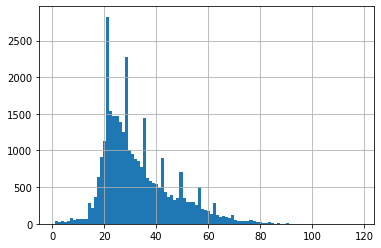

In [11]:
c = 'edad'
data0[c] = pd.to_numeric(data0[c])
data0[c].hist(bins=100)


In [12]:
c = 'grupo_etareo'
print(dict(data0[c].value_counts(dropna=False)))
edad = [x for x in data0[c].value_counts(dropna=False).index]
edad = dict(zip([int(x[:2]) for x in edad],edad))
edad = dict((edad[k],i) for i,k in enumerate(sorted(edad.keys())))
data0[c] = data0[c].replace(edad)
print(dict(data0[c].value_counts(dropna=False)))

{'29 A 59': 15677, '19 A 28': 13177, '60 Y MAS': 1663, '12 A 18': 1619, '7  A 11': 244, '0 A 6': 175}
{4: 15677, 3: 13177, 5: 1663, 2: 1619, 1: 244, 0: 175}


In [13]:
data0['dia_semana'] = data0['dia_semana'].str[0].astype(int)
data0['mes'] = data0['mes'].str.split('.').str[0].astype(int)
data0['ano'] = data0['ano'].astype(int)
data0['ano'].value_counts().sort_index()


2016        4
2017       49
2018    10119
2019     8127
2020     6647
2021     7609
Name: ano, dtype: int64

In [14]:
c = 'sexo'
data0[c] = data0[c].replace({"FEMENINO":1, "MASCULINO": 0})

In [15]:
c = 'tipo_de_vehiculo'
data0[c] = data0[c].replace({"SIN INFORMACION":pd.NA})

In [16]:
# # calculo de diferencia de tiempo
# data0['len'] = data0['hora_de_accidente'].str.len()
# data0.groupby('len',dropna=False)['hora_de_accidente'].max()
# data0['hora_de_accidente'] = data0['hora_de_accidente'].replace('00/01/1900',pd.NA)
# data['fecha_de_accidente'].astype(str)[:10] + " " + data['hora_de_accidente']

In [17]:
data0['costos'] = pd.to_numeric(data0['costos'])
data0 = data0[data0['costos']>0]

In [18]:
## outliers
def get_outliers(data):
    q1,q3 = data.quantile(0.25),data.quantile(0.75)
    iqr = q3-q1
    mi = q1 - (1.5*iqr)
    ma = q3 + (1.5*iqr)
    if mi<data.min(): mi = data.min()
    if ma>data.max(): ma = data.max()
    outliers = data.between(mi,ma)==False
    return outliers

C:\Users\dherrera\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


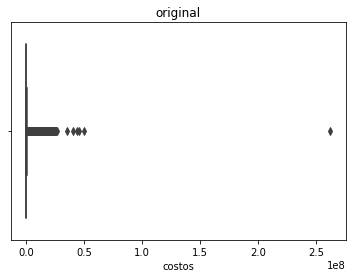

C:\Users\dherrera\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


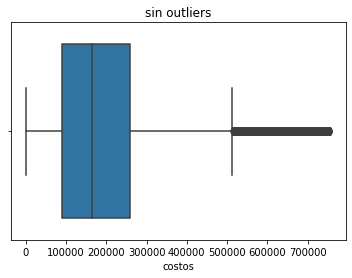

In [19]:
## remove outliers
outliers = get_outliers(data0[target])
outliers.value_counts()
sns.boxplot(data0[target]);
plt.title("original")
plt.show()
data0 = data0[~outliers]
sns.boxplot(data0[target]);
plt.title("sin outliers")
plt.show()

In [20]:
data0.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,"23,305.00000",32.60970,12.91249,1.00000,23.00000,29.00000,39.00000,118.00000
sexo,"23,305.00000",0.33508,0.47203,0.00000,0.00000,0.00000,1.00000,1.00000
requerimiento_de_cx,"23,305.00000",0.02888,0.16747,0.00000,0.00000,0.00000,0.00000,1.00000
referido_a_otra_ips,"23,305.00000",0.00120,0.03464,0.00000,0.00000,0.00000,0.00000,1.00000
politraumatismo,"23,305.00000",0.10551,0.30722,0.00000,0.00000,0.00000,0.00000,1.00000
condicion_egreso,"23,305.00000",0.00069,0.02619,0.00000,0.00000,0.00000,0.00000,1.00000
mes,"23,305.00000",6.26625,3.29860,1.00000,3.00000,6.00000,9.00000,12.00000
grupo_etareo,"23,305.00000",3.49157,0.72569,0.00000,3.00000,4.00000,4.00000,5.00000
ano,"23,305.00000","2,019.50191",1.10979,"2,016.00000","2,019.00000","2,019.00000","2,021.00000","2,021.00000"
dia_semana,"23,305.00000",4.01751,2.02616,1.00000,2.00000,4.00000,6.00000,7.00000


In [21]:
data0 = data0.dropna()
data0 = data0[[c for c in data0 if c!=target]+[target]]
data0.drop('grupo_etareo',axis=1, inplace=True)
print(data.shape, data0.shape)

(34206, 32) (23305, 13)


In [22]:
cols = list(data0.dtypes[data0.dtypes=='object'].index)
for c in cols:
    print(c, dict(data0[c].value_counts()))
data0[cols].drop_duplicates().head(10)
data0 = pd.get_dummies(data0, prefix_sep='__', drop_first=True)

tipo_de_vehiculo {'MOTO': 21151, 'CARRO': 1773, 'BUS': 167, 'BICICLETA': 105, 'CAMION': 70, 'PEATON': 30, 'CAMIONETA': 6, 'METROLINEA': 1, 'AMBULANCIA': 1, 'VOLQUETA': 1}
relacion_usuario/accidente {'CONDUCTOR': 16584, 'PASAJERO': 4954, 'PEATON': 1373, 'CICLISTA': 394}
ips {'SERVICLÍNICOS DROMEDICAS': 13904, 'CLÍNICA CHICAMOCHA': 5831, 'CLÍNICA LOS COMUNEROS': 3361, 'HOSPITAL UNIVERSITARIO DE SANTANDER': 209}


In [23]:
data0 = pd.get_dummies(data0, prefix_sep='__', drop_first=True)
data0 = data0[[c for c in data0 if c!=target]+[target]]
data0.columns = [unidecode.unidecode(c.lower().replace('/','_').replace('  ',' ').strip()).replace(' ','_') for c in data0]
data0.dtypes.value_counts()
data0.head()

,edad,sexo,requerimiento_de_cx,referido_a_otra_ips,politraumatismo,condicion_egreso,mes,ano,dia_semana,tipo_de_vehiculo__bicicleta,...,tipo_de_vehiculo__moto,tipo_de_vehiculo__peaton,tipo_de_vehiculo__volqueta,relacion_usuario_accidente__conductor,relacion_usuario_accidente__pasajero,relacion_usuario_accidente__peaton,ips__clinica_los_comuneros,ips__hospital_universitario_de_santander,ips__serviclinicos_dromedicas,costos
numero,,,,,,,,,,,,,,,,,,,,,
1,68,0,0,0,0,0,1,2018,7,0,...,1,0,0,1,0,0,1,0,0,60125
2,25,1,0,0,0,0,1,2018,1,0,...,1,0,0,1,0,0,1,0,0,112061
3,20,0,0,0,0,0,1,2018,3,0,...,1,0,0,1,0,0,1,0,0,54751
4,17,0,0,0,0,0,1,2018,7,0,...,1,0,0,1,0,0,1,0,0,444924
5,29,1,0,0,0,0,1,2018,5,0,...,1,0,0,1,0,0,1,0,0,55132


Correlacion de variables??

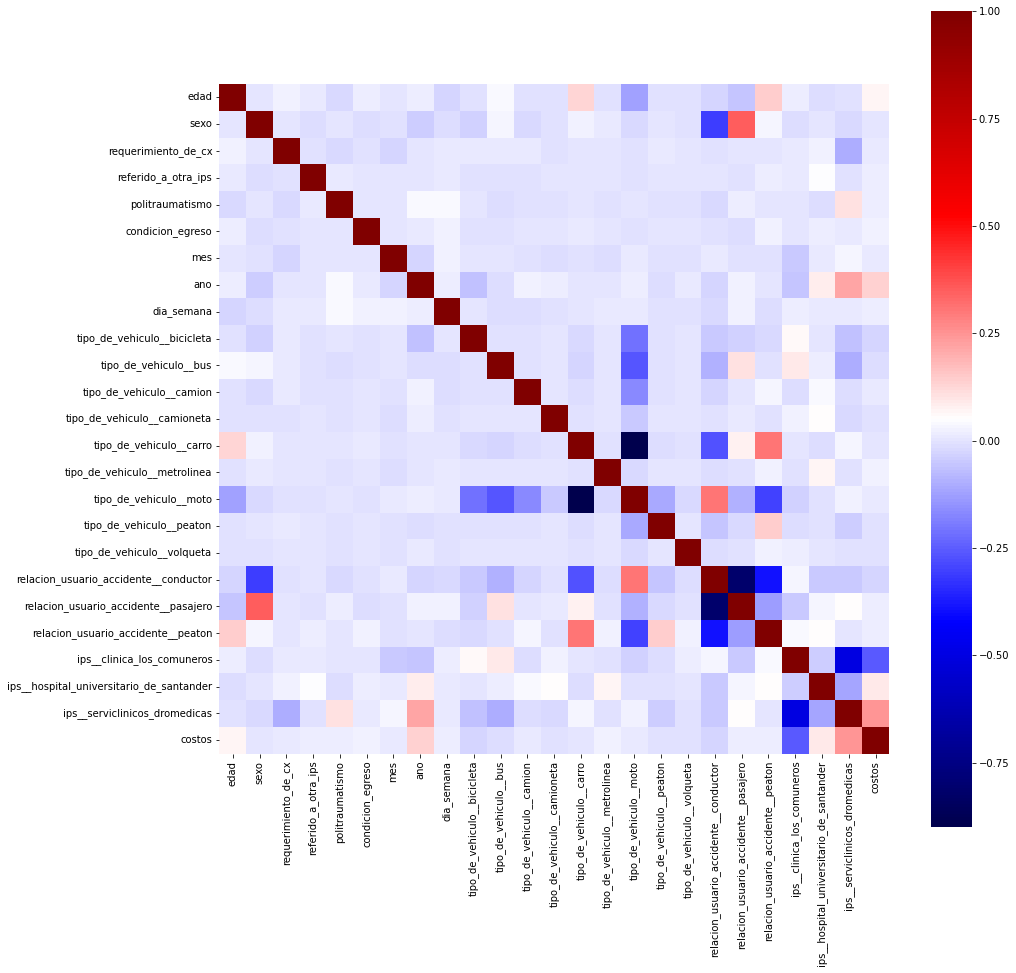

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(data0.corr(), cmap="seismic", square=True);

las variables: **`tipo_de_vehiculo__carro`** y **`tipo_de_vehiculo__moto`**, estan altamente correlacionadas, pareciera que fuesen complemento, es posible que por la informacion solo se tabule el que realmente corresponda

In [25]:
pd.crosstab(data0['tipo_de_vehiculo__carro'],data0['tipo_de_vehiculo__moto'])

tipo_de_vehiculo__moto,0,1
tipo_de_vehiculo__carro,,
0,381,21151
1,1773,0


In [26]:
pd.crosstab(data0['relacion_usuario_accidente__conductor'],data0['relacion_usuario_accidente__pasajero'])
# 'relacion_usuario_accidente__conductor','relacion_usuario_accidente__pasajero'

relacion_usuario_accidente__pasajero,0,1
relacion_usuario_accidente__conductor,,
0,1767,4954
1,16584,0


In [27]:
pd.crosstab(data0['relacion_usuario_accidente__conductor'],data0['relacion_usuario_accidente__peaton'])

relacion_usuario_accidente__peaton,0,1
relacion_usuario_accidente__conductor,,
0,5348,1373
1,16584,0


In [28]:
data0 = data0.drop(['tipo_de_vehiculo__carro','relacion_usuario_accidente__pasajero','relacion_usuario_accidente__peaton'],axis=1)

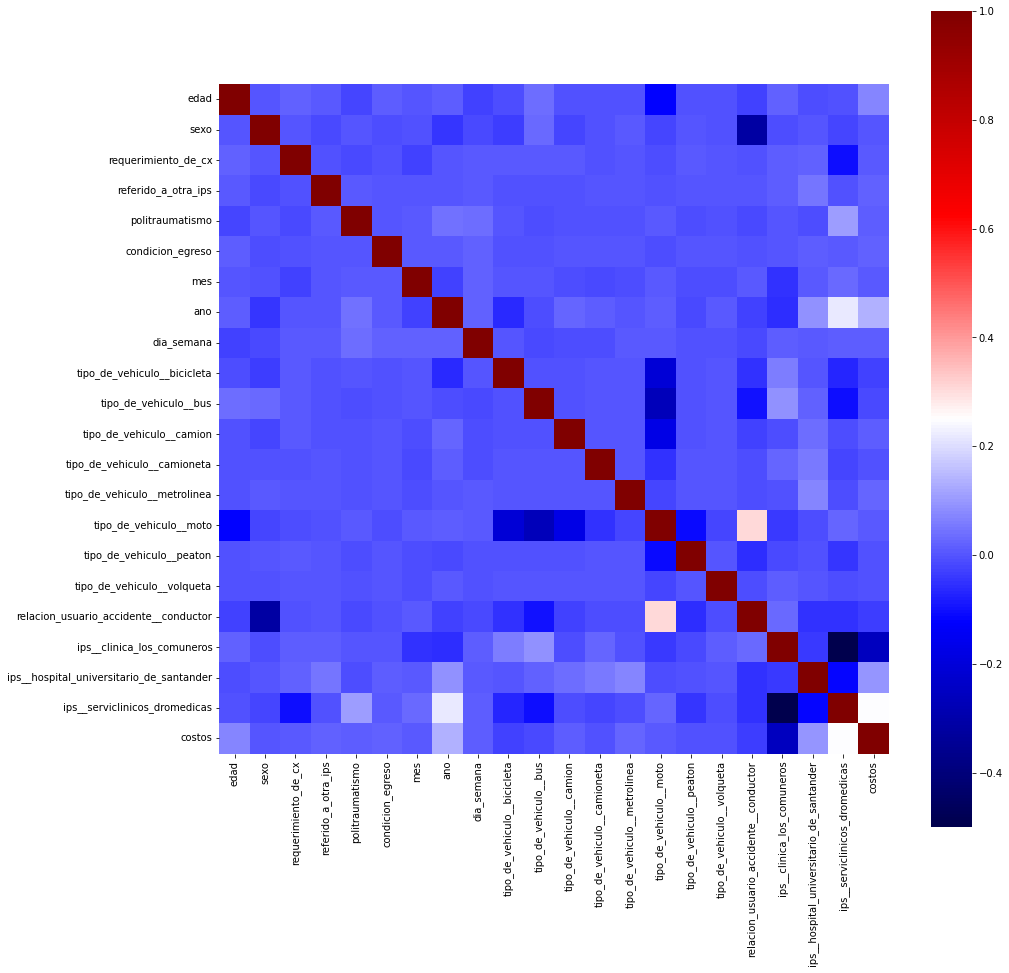

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(data0.corr(), cmap="seismic", square=True);

## 

Estandarizar

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [31]:
data1 = pd.DataFrame(MinMaxScaler().fit_transform(data0),columns=data0.columns)
data1.describe().T


,count,mean,std,min,25%,50%,75%,max
edad,"23,305.00000",0.27017,0.11036,0.00000,0.18803,0.23932,0.32479,1.00000
sexo,"23,305.00000",0.33508,0.47203,0.00000,0.00000,0.00000,1.00000,1.00000
requerimiento_de_cx,"23,305.00000",0.02888,0.16747,0.00000,0.00000,0.00000,0.00000,1.00000
referido_a_otra_ips,"23,305.00000",0.00120,0.03464,0.00000,0.00000,0.00000,0.00000,1.00000
politraumatismo,"23,305.00000",0.10551,0.30722,0.00000,0.00000,0.00000,0.00000,1.00000
condicion_egreso,"23,305.00000",0.00069,0.02619,0.00000,0.00000,0.00000,0.00000,1.00000
mes,"23,305.00000",0.47875,0.29987,0.00000,0.18182,0.45455,0.72727,1.00000
ano,"23,305.00000",0.70038,0.22196,0.00000,0.60000,0.60000,1.00000,1.00000
dia_semana,"23,305.00000",0.50292,0.33769,0.00000,0.16667,0.50000,0.83333,1.00000
tipo_de_vehiculo__bicicleta,"23,305.00000",0.00451,0.06697,0.00000,0.00000,0.00000,0.00000,1.00000


In [32]:
data1

,edad,sexo,requerimiento_de_cx,referido_a_otra_ips,politraumatismo,condicion_egreso,mes,ano,dia_semana,tipo_de_vehiculo__bicicleta,...,tipo_de_vehiculo__camioneta,tipo_de_vehiculo__metrolinea,tipo_de_vehiculo__moto,tipo_de_vehiculo__peaton,tipo_de_vehiculo__volqueta,relacion_usuario_accidente__conductor,ips__clinica_los_comuneros,ips__hospital_universitario_de_santander,ips__serviclinicos_dromedicas,costos
0,0.57265,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.40000,1.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.07908
1,0.20513,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.40000,0.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.14776
2,0.16239,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.40000,0.33333,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.07198
3,0.13675,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.40000,1.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.58792
4,0.23932,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.40000,0.66667,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.07248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23300,0.00855,1.00000,0.00000,0.00000,0.00000,0.00000,0.90909,1.00000,1.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.14340
23301,0.18803,0.00000,0.00000,0.00000,0.00000,0.00000,0.90909,1.00000,0.33333,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.11740
23302,0.18803,1.00000,1.00000,0.00000,0.00000,0.00000,0.90909,1.00000,0.83333,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.34485
23303,0.19658,0.00000,0.00000,0.00000,0.00000,0.00000,0.90909,1.00000,0.83333,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.15929


# ML

In [33]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [34]:
def make_data(data,target):
    X    = data.drop(target,axis=1).copy()
    y    = data[target].copy()
    print('X.shape=', X.shape, ', y.shape=', y.shape)
    # splitting the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    print("x_train=",x_train.shape,", x_test=",x_test.shape, ", y_train=",y_train.shape,", y_test=",y_test.shape)
    return X, y, x_train, y_train, x_test, y_test

## Evaluacion de modelos

In [35]:
models = dict()

In [36]:
X, y, x_train, y_train, x_test, y_test = make_data(data=data1,target=target)

X.shape= (23305, 21) , y.shape= (23305,)
x_train= (18644, 21) , x_test= (4661, 21) , y_train= (18644,) , y_test= (4661,)


In [37]:
from sklearn.metrics import r2_score, mean_squared_error

### Base line

#### Statsmodels

In [38]:
import statsmodels.api as sm

In [39]:
def fit_models_statsmodels(model, X, y):
    MOD = model(y,X)        ## stats models
    MOD = MOD.fit()
    y_pred = MOD.predict(X)
    r2 = r2_score(y,y_pred)
    rms2 = np.sqrt(mean_squared_error(y,y_pred))
    return {"model": MOD, "predictions": y_pred.values, "r2_score": r2, "rms2": rms2}

In [40]:
models['LinearRegression(Statsmodels with k)'] = fit_models_statsmodels(model=sm.OLS, X=sm.add_constant(X), y=y)

In [41]:
models['LinearRegression(Statsmodels with out k)'] = fit_models_statsmodels(model=sm.OLS, X=X, y=y)

In [42]:
best_pv = list(models['LinearRegression(Statsmodels with out k)']['model'].pvalues[models['LinearRegression(Statsmodels with out k)']['model'].pvalues<0.05].index)
best_pv

models['LinearRegression(Statsmodels best p-value)'] = fit_models_statsmodels(model=sm.OLS, X=X[best_pv], y=y)

#### sklearn: LinearRegression

In [43]:
# importing module
from sklearn.linear_model import LinearRegression

In [44]:
def fit_models_sklearn(model, X, y):
    try:
        MOD = model.fit(X,y,random_state=123)
    except:
        MOD = model.fit(X,y)
    y_pred = MOD.predict(X)
    r2 = r2_score(y,y_pred)
    rms2 = np.sqrt(mean_squared_error(y,y_pred))
    return {"model": MOD, "predictions": y_pred, "r2_score": r2, "rms2": rms2}

In [45]:
models['LinearRegression'] = fit_models_sklearn(model=LinearRegression(), X=X, y=y)

In [46]:
models['LinearRegression(with k)'] = fit_models_sklearn(model=LinearRegression(fit_intercept=True), X=X, y=y)

#### sklearn: Random Forest

In [47]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor

In [48]:
models['RandomForest_n=10'] = fit_models_sklearn(
                                                model=RandomForestRegressor(n_estimators=10, random_state=123)
                                                , X=X
                                                , y=y
                                            )

In [49]:
models['RandomForest_n=100'] = fit_models_sklearn(
                                                model=RandomForestRegressor(n_estimators=100, random_state=123)
                                                , X=X
                                                , y=y
                                            )

In [50]:
models['RandomForest_n=300'] = fit_models_sklearn(
                                                model=RandomForestRegressor(n_estimators=300, random_state=123)
                                                , X=X
                                                , y=y
                                            )

In [51]:
models['RandomForest_n=500'] = fit_models_sklearn(
                                                model=RandomForestRegressor(n_estimators=500, random_state=123)
                                                , X=X
                                                , y=y
                                            )

In [52]:
models['RandomForest_n=1000'] = fit_models_sklearn(
                                                model=RandomForestRegressor(n_estimators=1000, random_state=123)
                                                , X=X
                                                , y=y
                                            )

In [53]:
model_eval = pd.DataFrame.from_dict(dict((k,{"r2_score":v['r2_score'], "rms2":v['rms2']}) for k,v in models.items())).T
model_eval = model_eval.sort_values(['rms2','r2_score'],ascending=[True,False])
model_eval

,r2_score,rms2
RandomForest_n=1000,0.77103,0.09270
RandomForest_n=500,0.77061,0.09278
RandomForest_n=300,0.77041,0.09283
RandomForest_n=100,0.76724,0.09346
RandomForest_n=10,0.72281,0.10200
LinearRegression(Statsmodels with k),0.11043,0.18272
LinearRegression,0.11043,0.18272
LinearRegression(with k),0.11043,0.18272
LinearRegression(Statsmodels with out k),0.09706,0.18409
LinearRegression(Statsmodels best p-value),0.09705,0.18409


## Plotting

In [54]:
predict_plt = pd.DataFrame()
predict_plt['target'] = y
for k,v in models.items():
    predict_plt[k] = v['predictions']
predict_plt = predict_plt.reset_index().melt(id_vars=['index','target'], var_name='model', value_name='predict')
predict_plt

,index,target,model,predict
0,0,0.07908,LinearRegression(Statsmodels with k),0.16861
1,1,0.14776,LinearRegression(Statsmodels with k),0.11461
2,2,0.07198,LinearRegression(Statsmodels with k),0.10965
3,3,0.58792,LinearRegression(Statsmodels with k),0.11190
4,4,0.07248,LinearRegression(Statsmodels with k),0.12465
...,...,...,...,...
233045,23300,0.14340,RandomForest_n=1000,0.20090
233046,23301,0.11740,RandomForest_n=1000,0.13998
233047,23302,0.34485,RandomForest_n=1000,0.31509
233048,23303,0.15929,RandomForest_n=1000,0.21575


C:\Users\dherrera\AppData\Local\Temp\8\ipykernel_45976\3530755113.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(f'fig1.png')
C:\Users\dherrera\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


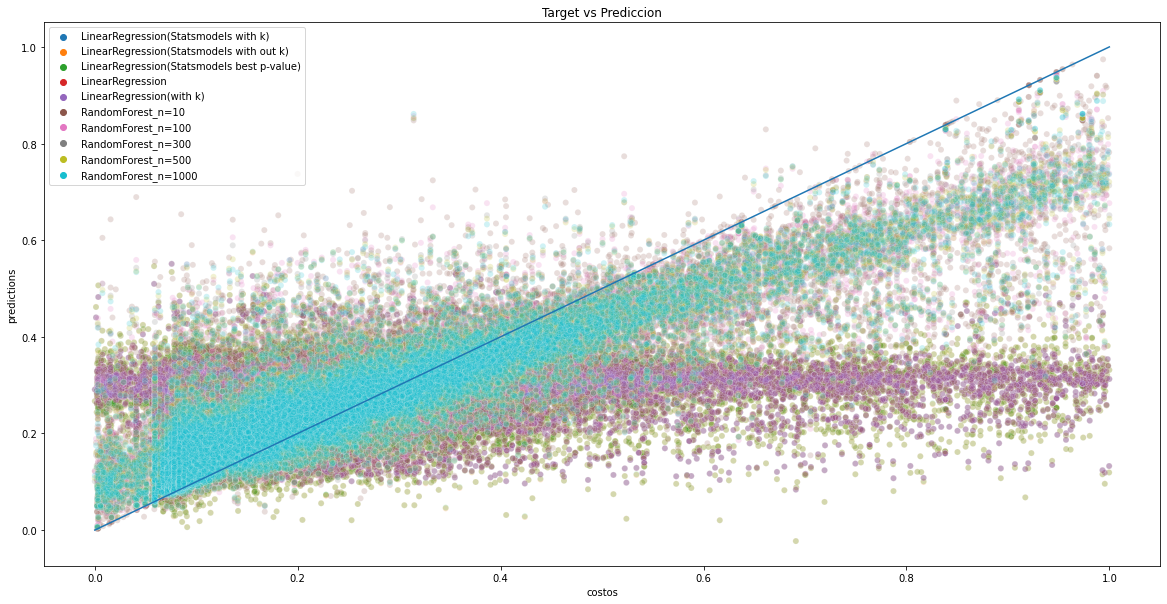

In [55]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(data=predict_plt, x="target", y="predict", alpha=0.2, hue="model")
u=np.linspace(data1[target].min(),data1[target].max(),5)
plt.plot(u,u)
plt.xlabel(target)
plt.ylabel("predictions")
plt.legend()
plt.title("Target vs Prediccion")
fig.savefig(f'fig1.png')
plt.show()

# Entregable
- Nombre de la ponencia
- autor de la ponencia
- descripcion del problema
- descripcion de los datos
- metodologia usada: lineal y rf
- que resultados obtuvo
- trabajo futuro
- un grafico final

Entregable: PDF, maximo 1 pag
